In [1]:
#-*- coding: utf-8 -*

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
X = np.append(np.random.poisson(lam=10, size=40), 
              np.random.poisson(lam=100, size=10))
X


array([ 12,   4,  12,   9,   9,   4,  10,  17,  12,  15,  11,   8,  12,
         9,  15,   5,   9,   9,   8,   9,  10,  10,  13,   3,   7,  13,
         7,  10,  11,  12,   5,   8,   6,   9,   8,  10,   3,  12,  10,
        10, 128, 102,  98,  98, 101,  84,  98, 115, 109,  92])

In [3]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_


In [4]:
gini(X)


0.5809707351891507

In [9]:
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
#X_lorenz[0], X_lorenz[-1]
X_lorenz

array([0.        , 0.00856531, 0.01142041, 0.01998572, 0.02640971,
       0.03283369, 0.03568879, 0.04282655, 0.05496074, 0.06352605,
       0.07423269, 0.08208423, 0.08779443, 0.09635974, 0.10278373,
       0.11349036, 0.11705924, 0.12348323, 0.12990721, 0.13561742,
       0.1420414 , 0.14917916, 0.15631692, 0.165596  , 0.16773733,
       0.17273376, 0.18201285, 0.18700928, 0.19414704, 0.20199857,
       0.21056388, 0.21413276, 0.21984297, 0.22412562, 0.23054961,
       0.23625981, 0.24339757, 0.2455389 , 0.25410421, 0.26124197,
       0.26837973, 0.35974304, 0.43254818, 0.50249822, 0.57244825,
       0.64453961, 0.70449679, 0.77444682, 0.85653105, 0.93433262,
       1.        ])

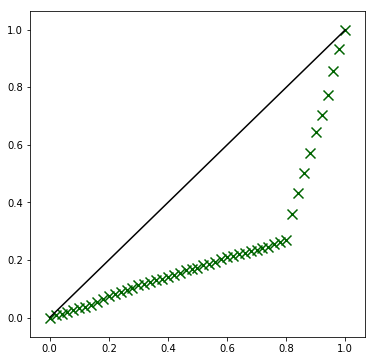

In [6]:
fig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='x', color='darkgreen', s=100)
## line plot of equality
ax.plot([0,1], [0,1], color='k')
